In [385]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm

In [386]:
sns.set(rc={'figure.figsize': (12,6)})

In [387]:
path_microsoft = "../../data/Microsoft_Stock.csv"
path_stack_overflow = "../../data/MLTollsStackOverflow.csv"
path_fires_brazil = "../../data/amazon.csv"

df_microsoft = pd.read_csv(path_microsoft)
df_stack = pd.read_csv(path_stack_overflow)
df_fires = pd.read_csv(path_fires_brazil, encoding='ISO-8859-1')

## Microsoft Stock Series

In [388]:
df_microsoft.head()

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438


In [389]:
df_microsoft.tail()

,Date,Open,High,Low,Close,Volume
1506,3/25/2021 16:00:00,235.30,236.94,231.57,232.34,34061853
1507,3/26/2021 16:00:00,231.55,236.71,231.55,236.48,25479853
1508,3/29/2021 16:00:00,236.59,236.80,231.88,235.24,25227455
1509,3/30/2021 16:00:00,233.53,233.85,231.10,231.85,24792012
1510,3/31/2021 16:00:00,232.91,239.10,232.39,235.77,43623471


In [390]:
df_microsoft.shape

(1511, 6)

In [391]:
df_microsoft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1511 non-null   object 
 1   Open    1511 non-null   float64
 2   High    1511 non-null   float64
 3   Low     1511 non-null   float64
 4   Close   1511 non-null   float64
 5   Volume  1511 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 71.0+ KB


In [392]:
df_microsoft['Date'].unique()

array(['4/1/2015 16:00:00', '4/2/2015 16:00:00', '4/6/2015 16:00:00', ...,
       '3/29/2021 16:00:00', '3/30/2021 16:00:00', '3/31/2021 16:00:00'],
      dtype=object)

In [393]:
df_microsoft['Date'] = pd.to_datetime(df_microsoft['Date'])
df_microsoft['Date'] = df_microsoft['Date'].dt.date

In [394]:
df_microsoft.head()

,Date,Open,High,Low,Close,Volume
0,2015-04-01,40.60,40.76,40.31,40.72,36865322
1,2015-04-02,40.66,40.74,40.12,40.29,37487476
2,2015-04-06,40.34,41.78,40.18,41.55,39223692
3,2015-04-07,41.61,41.91,41.31,41.53,28809375
4,2015-04-08,41.48,41.69,41.04,41.42,24753438


In [395]:
df_microsoft = df_microsoft.sort_values(by='Date')

In [396]:
df_microsoft.head(10)

,Date,Open,High,Low,Close,Volume
0,2015-04-01,40.60,40.76,40.31,40.72,36865322
1,2015-04-02,40.66,40.74,40.12,40.29,37487476
2,2015-04-06,40.34,41.78,40.18,41.55,39223692
3,2015-04-07,41.61,41.91,41.31,41.53,28809375
4,2015-04-08,41.48,41.69,41.04,41.42,24753438
5,2015-04-09,41.25,41.62,41.25,41.48,25723861
6,2015-04-10,41.63,41.95,41.41,41.72,28022002
7,2015-04-13,41.40,42.06,41.39,41.76,30276692
8,2015-04-14,41.80,42.03,41.39,41.65,24244382
9,2015-04-15,41.76,42.46,41.68,42.26,27343581


<Axes: >

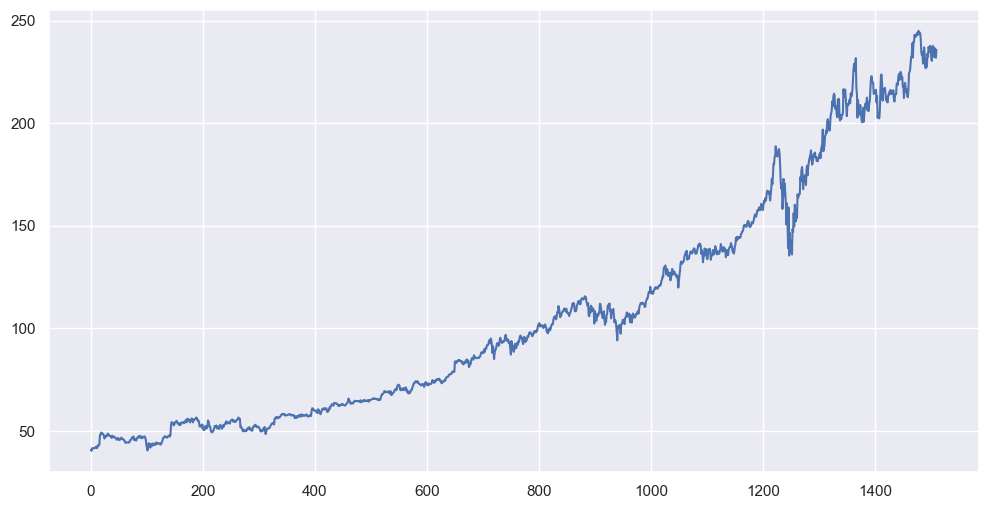

In [397]:
df_microsoft['Close'].plot()

In [398]:
series_microsoft = df_microsoft.drop(['Open','High','Low','Volume'], axis=1)
series_microsoft.head()

,Date,Close
0,2015-04-01,40.72
1,2015-04-02,40.29
2,2015-04-06,41.55
3,2015-04-07,41.53
4,2015-04-08,41.42


In [399]:
series_microsoft = series_microsoft.set_index('Date')
series_microsoft

,Close
Date,
2015-04-01,40.72
2015-04-02,40.29
2015-04-06,41.55
2015-04-07,41.53
2015-04-08,41.42
...,...
2021-03-25,232.34
2021-03-26,236.48
2021-03-29,235.24


In [400]:
decomp_microsoft = seasonal_decompose(series_microsoft, period=365)

In [401]:
decomp_microsoft.trend

Date
2015-04-01   NaN
2015-04-02   NaN
2015-04-06   NaN
2015-04-07   NaN
2015-04-08   NaN
              ..
2021-03-25   NaN
2021-03-26   NaN
2021-03-29   NaN
2021-03-30   NaN
2021-03-31   NaN
Name: trend, Length: 1511, dtype: float64

In [402]:
decomp_microsoft.seasonal

Date
2015-04-01    1.756927
2015-04-02    3.128297
2015-04-06    2.125183
2015-04-07    1.543402
2015-04-08    2.080918
                ...   
2021-03-25   -1.550908
2021-03-26   -1.976863
2021-03-29   -0.929027
2021-03-30   -1.195036
2021-03-31   -1.059621
Name: seasonal, Length: 1511, dtype: float64

In [403]:
decomp_microsoft.resid

Date
2015-04-01   NaN
2015-04-02   NaN
2015-04-06   NaN
2015-04-07   NaN
2015-04-08   NaN
              ..
2021-03-25   NaN
2021-03-26   NaN
2021-03-29   NaN
2021-03-30   NaN
2021-03-31   NaN
Name: resid, Length: 1511, dtype: float64

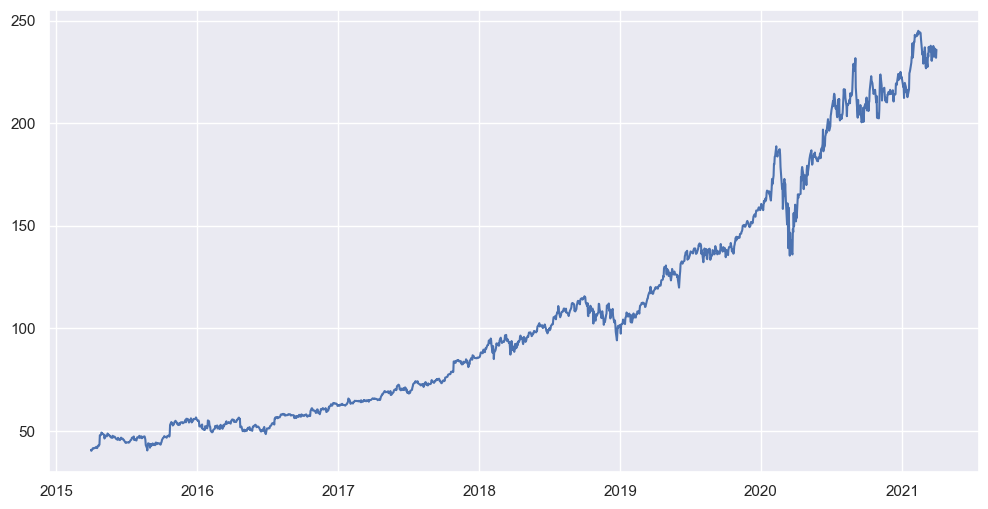

In [404]:
plt.plot(series_microsoft)

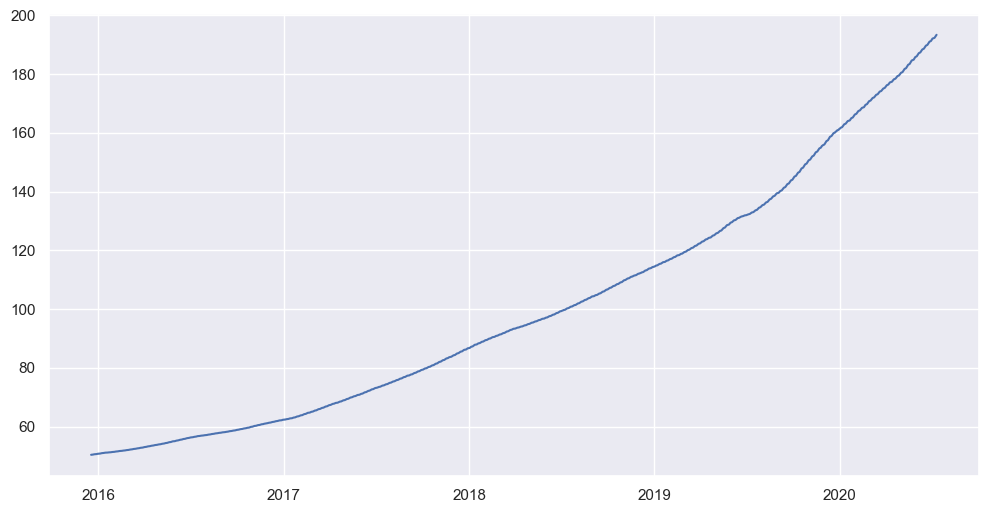

In [405]:
plt.plot(decomp_microsoft.trend)

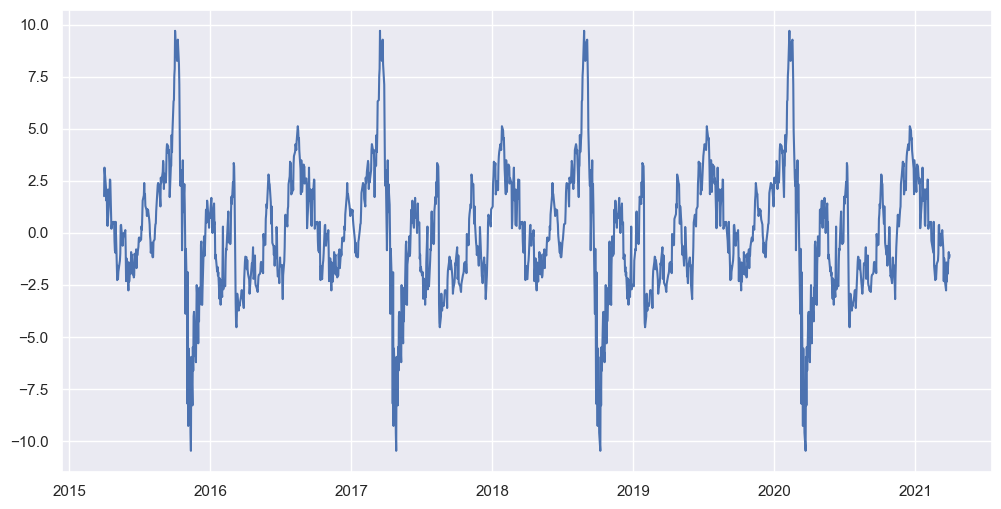

In [406]:
plt.plot(decomp_microsoft.seasonal)

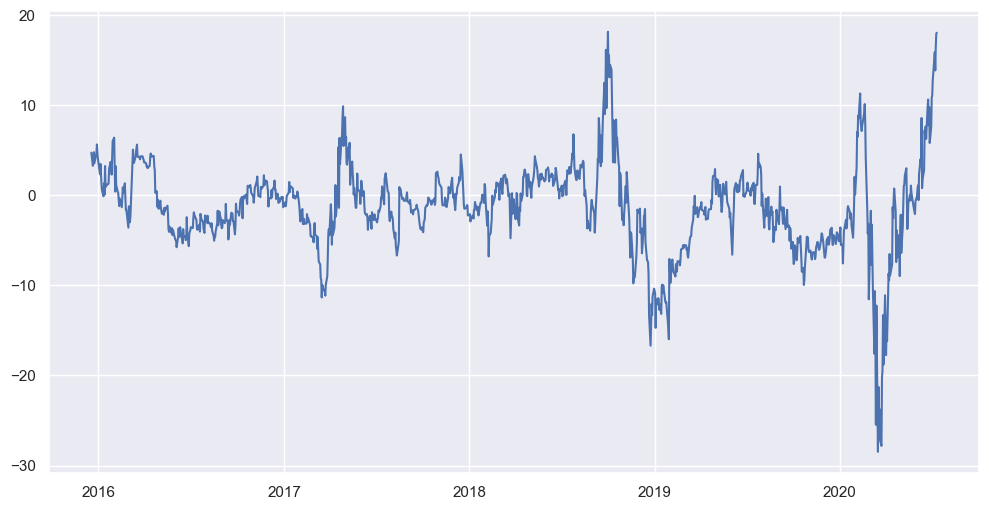

In [407]:
plt.plot(decomp_microsoft.resid)

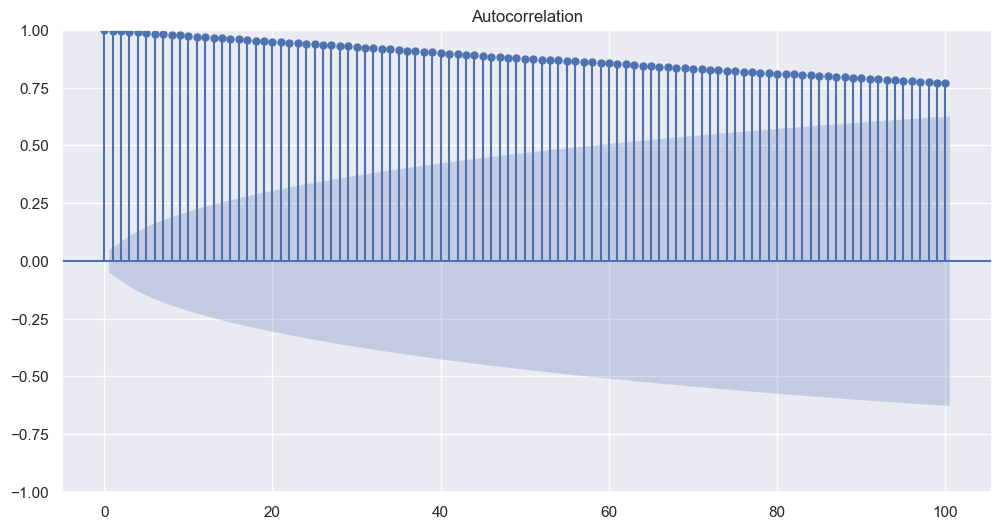

In [408]:
sm.graphics.tsa.plot_acf(series_microsoft, lags=100)
plt.show()

## StackOverflow Question Series

In [359]:
df_stack.head()

,month,nltk,spacy,stanford-nlp,python,r,numpy,scipy,matlab,machine-learning,...,Plato,Sympy,Flair,stanford-nlp.1,pyqt,Nolearn,Lasagne,OCR,Apache-spark-mlib,azure-virtual-machine
0,09-Jan,0,0,0,631,8,6,2,19,8,...,0,1,0,0,5,0,0,5,0,0
1,09-Feb,1,0,0,633,9,7,3,27,4,...,0,0,0,0,5,0,0,11,0,0
2,09-Mar,0,0,0,766,4,4,2,24,3,...,0,0,0,0,7,0,0,2,0,0
3,09-Apr,0,0,0,768,12,6,3,32,10,...,0,0,0,0,11,0,0,5,0,0
4,09-May,1,0,0,1003,2,7,2,42,7,...,0,0,0,0,10,0,0,3,0,0


In [360]:
df_stack.tail()

,month,nltk,spacy,stanford-nlp,python,r,numpy,scipy,matlab,machine-learning,...,Plato,Sympy,Flair,stanford-nlp.1,pyqt,Nolearn,Lasagne,OCR,Apache-spark-mlib,azure-virtual-machine
127,19-Aug,57,76,24,20257,4486,1111,212,371,583,...,0,33,0,22,144,0,0,40,16,25
128,19-Sep,54,62,16,19207,4474,1020,135,362,538,...,0,39,0,15,147,0,4,49,28,16
129,19-Oct,73,79,27,23414,5138,1310,188,523,750,...,0,72,0,27,170,0,3,70,21,19
130,19-Nov,72,79,14,23602,4883,1297,199,479,918,...,0,58,2,14,182,0,1,73,16,19
131,19-Dec,82,72,13,20058,4150,1118,159,349,983,...,0,56,0,13,173,0,0,56,16,18


In [361]:
df_stack.shape

(132, 82)

In [362]:
df_stack.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 82 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   month                  132 non-null    object 
 1   nltk                   132 non-null    int64  
 2   spacy                  132 non-null    int64  
 3   stanford-nlp           132 non-null    int64  
 4   python                 132 non-null    int64  
 5   r                      132 non-null    int64  
 6   numpy                  132 non-null    int64  
 7   scipy                  132 non-null    int64  
 8   matlab                 132 non-null    int64  
 9   machine-learning       132 non-null    int64  
 10  pandas                 132 non-null    int64  
 11  pytorch                132 non-null    int64  
 12  keras                  132 non-null    int64  
 13  nlp                    132 non-null    int64  
 14  apache-spark           132 non-null    int64  
 15  hadoop

In [363]:
df_stack['month'].unique()

array(['09-Jan', '09-Feb', '09-Mar', '09-Apr', '09-May', '09-Jun',
       '09-Jul', '09-Aug', '09-Sep', '09-Oct', '09-Nov', '09-Dec',
       '10-Jan', '10-Feb', '10-Mar', '10-Apr', '10-May', '10-Jun',
       '10-Jul', '10-Aug', '10-Sep', '10-Oct', '10-Nov', '10-Dec',
       '11-Jan', '11-Feb', '11-Mar', '11-Apr', '11-May', '11-Jun',
       '11-Jul', '11-Aug', '11-Sep', '11-Oct', '11-Nov', '11-Dec',
       '12-Jan', '12-Feb', '12-Mar', '12-Apr', '12-May', '12-Jun',
       '12-Jul', '12-Aug', '12-Sep', '12-Oct', '12-Nov', '12-Dec',
       '13-Jan', '13-Feb', '13-Mar', '13-Apr', '13-May', '13-Jun',
       '13-Jul', '13-Aug', '13-Sep', '13-Oct', '13-Nov', '13-Dec',
       '14-Jan', '14-Feb', '14-Mar', '14-Apr', '14-May', '14-Jun',
       '14-Jul', '14-Aug', '14-Sep', '14-Oct', '14-Nov', '14-Dec',
       '15-Jan', '15-Feb', '15-Mar', '15-Apr', '15-May', '15-Jun',
       '15-Jul', '15-Aug', '15-Sep', '15-Oct', '15-Nov', '15-Dec',
       '16-Jan', '16-Feb', '16-Mar', '16-Apr', '16-May', '16-J

In [364]:
df_stack_matlab = df_stack[['month', 'matlab']]

In [365]:
df_stack_matlab.head()

,month,matlab
0,09-Jan,19
1,09-Feb,27
2,09-Mar,24
3,09-Apr,32
4,09-May,42


In [366]:
df_stack_matlab.tail()

,month,matlab
127,19-Aug,371
128,19-Sep,362
129,19-Oct,523
130,19-Nov,479
131,19-Dec,349


In [367]:
date = pd.date_range(start='2009-1-31', end = '2019-12-31', freq='M')

date = pd.Series(date)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3024\3581959062.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date = pd.date_range(start='2009-1-31', end = '2019-12-31', freq='M')


In [368]:
df_stack_matlab['month'] = date

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3024\3919533719.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stack_matlab['month'] = date


In [369]:
df_stack_matlab.head()

,month,matlab
0,2009-01-31,19
1,2009-02-28,27
2,2009-03-31,24
3,2009-04-30,32
4,2009-05-31,42


In [370]:
df_stack_matlab = df_stack_matlab.set_index('month')

In [371]:
df_stack_matlab.head()

,matlab
month,
2009-01-31,19
2009-02-28,27
2009-03-31,24
2009-04-30,32
2009-05-31,42


<Axes: xlabel='month'>

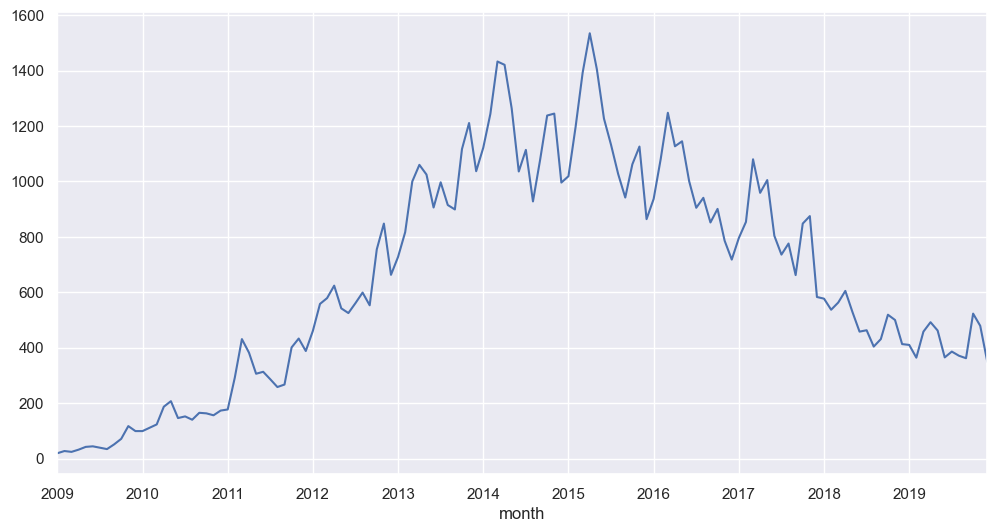

In [372]:
df_stack_matlab['matlab'].plot()

In [373]:
df_stack_matlab.head()

,matlab
month,
2009-01-31,19
2009-02-28,27
2009-03-31,24
2009-04-30,32
2009-05-31,42


In [374]:
df_stack_matlab.index = pd.to_datetime(df_stack_matlab.index)

In [375]:
decomp_matlab = seasonal_decompose(df_stack_matlab, period=40)

In [376]:
decomp_matlab.trend

month
2009-01-31   NaN
2009-02-28   NaN
2009-03-31   NaN
2009-04-30   NaN
2009-05-31   NaN
              ..
2019-08-31   NaN
2019-09-30   NaN
2019-10-31   NaN
2019-11-30   NaN
2019-12-31   NaN
Name: trend, Length: 132, dtype: float64

In [377]:
decomp_matlab.seasonal

month
2009-01-31   -123.270729
2009-02-28    -81.026979
2009-03-31    -38.658229
2009-04-30   -158.051979
2009-05-31   -151.351979
                 ...    
2019-08-31    -18.139479
2019-09-30     20.410521
2019-10-31    -10.183229
2019-11-30     30.185521
2019-12-31     74.285521
Name: seasonal, Length: 132, dtype: float64

In [378]:
decomp_matlab.resid

month
2009-01-31   NaN
2009-02-28   NaN
2009-03-31   NaN
2009-04-30   NaN
2009-05-31   NaN
              ..
2019-08-31   NaN
2019-09-30   NaN
2019-10-31   NaN
2019-11-30   NaN
2019-12-31   NaN
Name: resid, Length: 132, dtype: float64

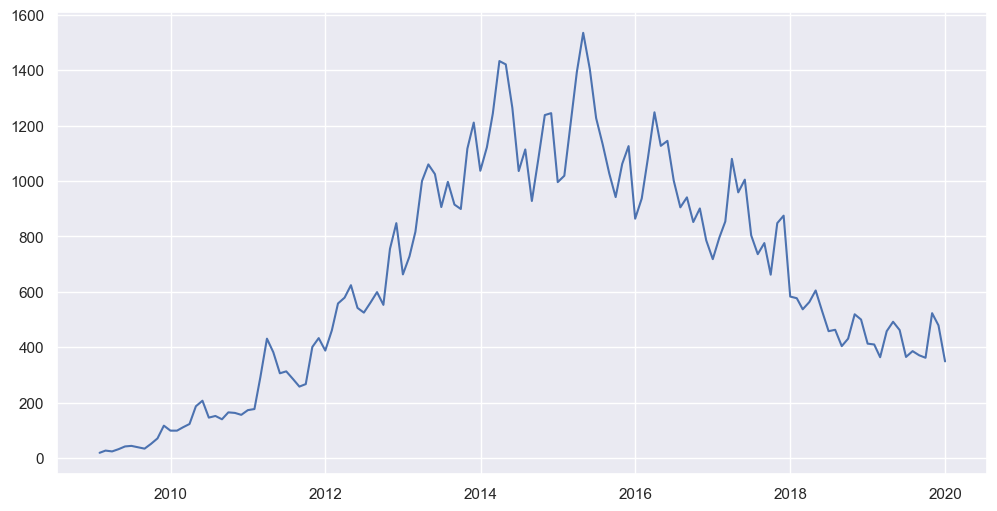

In [379]:
plt.plot(df_stack_matlab)

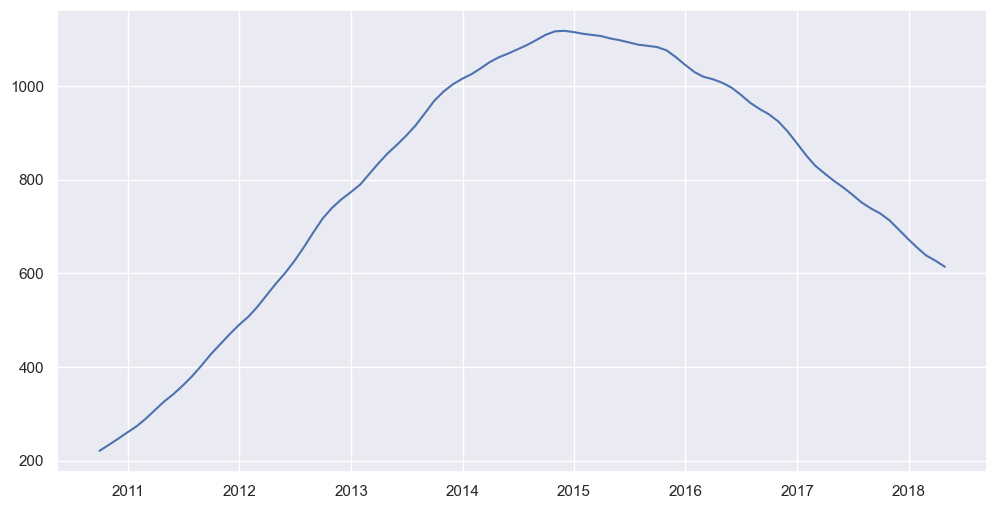

In [380]:
plt.plot(decomp_matlab.trend)

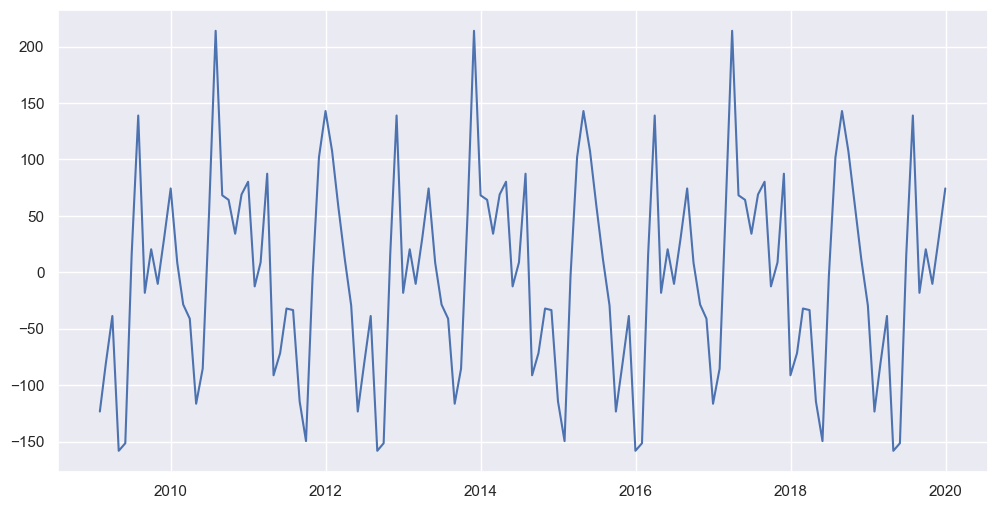

In [381]:
plt.plot(decomp_matlab.seasonal)

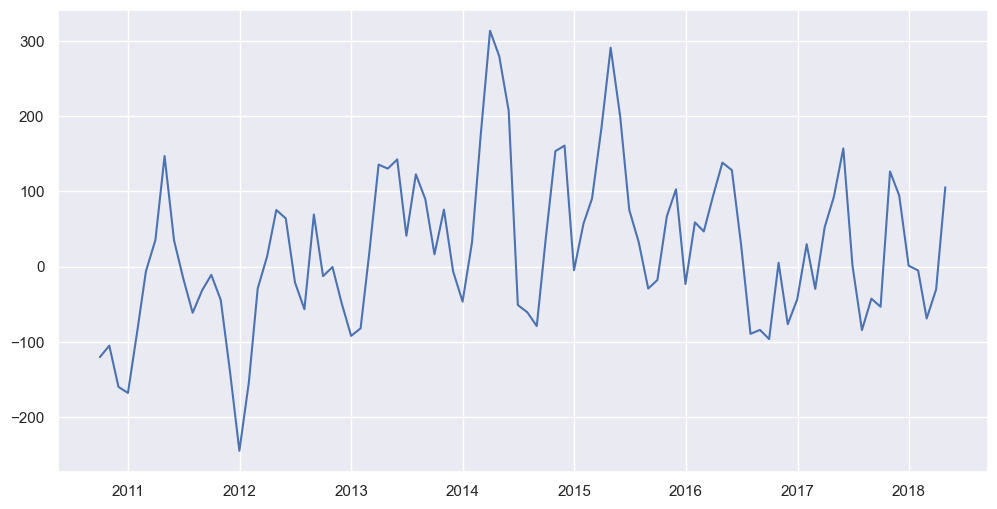

In [382]:
plt.plot(decomp_matlab.resid)

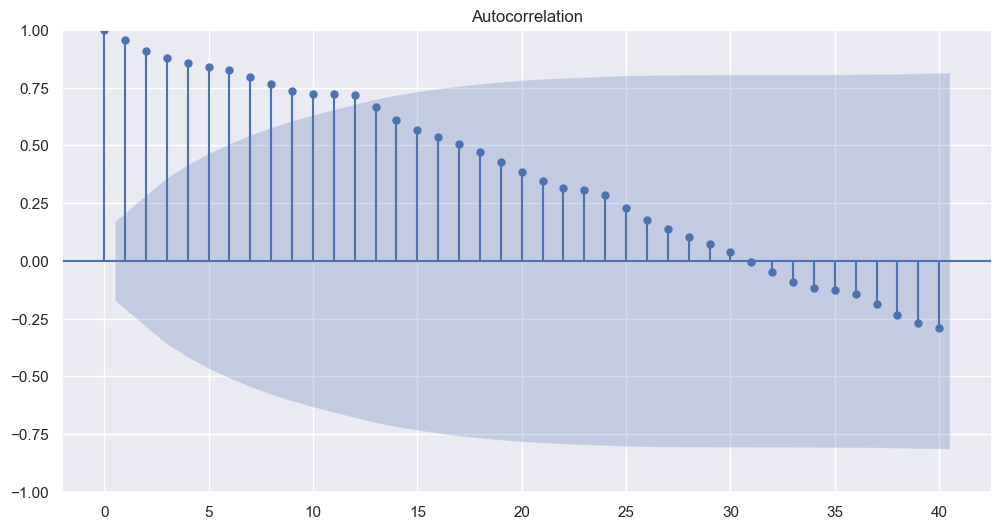

In [383]:
sm.graphics.tsa.plot_acf(df_stack_matlab, lags=40)
plt.show()

## Forest Fires in Brazil Series

In [131]:
df_fires.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [132]:
df_fires.tail()

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


In [133]:
df_fires.shape

(6454, 5)

In [134]:
df_fires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
 4   date    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


In [135]:
df_fires['date'].unique()

array(['1998-01-01', '1999-01-01', '2000-01-01', '2001-01-01',
       '2002-01-01', '2003-01-01', '2004-01-01', '2005-01-01',
       '2006-01-01', '2007-01-01', '2008-01-01', '2009-01-01',
       '2010-01-01', '2011-01-01', '2012-01-01', '2013-01-01',
       '2014-01-01', '2015-01-01', '2016-01-01', '2017-01-01'],
      dtype=object)

In [136]:
df_fires_acre = df_fires[df_fires['state'] == "Acre"]

In [137]:
df_fires_acre

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
...,...,...,...,...,...
234,2012,Acre,Dezembro,1.0,2012-01-01
235,2013,Acre,Dezembro,3.0,2013-01-01
236,2014,Acre,Dezembro,6.0,2014-01-01
237,2015,Acre,Dezembro,8.0,2015-01-01


In [138]:
df_fires_acre.info()

<class 'pandas.core.frame.DataFrame'>
Index: 239 entries, 0 to 238
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    239 non-null    int64  
 1   state   239 non-null    object 
 2   month   239 non-null    object 
 3   number  239 non-null    float64
 4   date    239 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 11.2+ KB


In [139]:
df_fires_acre.info()

<class 'pandas.core.frame.DataFrame'>
Index: 239 entries, 0 to 238
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    239 non-null    int64  
 1   state   239 non-null    object 
 2   month   239 non-null    object 
 3   number  239 non-null    float64
 4   date    239 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 11.2+ KB


In [140]:
df_fires_acre = df_fires_acre.sort_values(by='year')

In [141]:
month_map = {
    'Janeiro': '1',
    'Fevereiro': '2',
    'Março': '3',
    'Abril': '4',
    'Maio': '5',
    'Junho': '6',
    'Julho': '7',
    'Agosto': '8',
    'Setembro': '9',
    'Outubro': '10',
    'Novembro': '11',
    'Dezembro': '12'
}

df_fires_acre['month'] = df_fires_acre['month'].map(month_map)

In [142]:
df_fires_acre.head()

,year,state,month,number,date
0,1998,Acre,1,0.0,1998-01-01
120,1998,Acre,7,37.0,1998-01-01
80,1998,Acre,5,0.0,1998-01-01
140,1998,Acre,8,130.0,1998-01-01
60,1998,Acre,4,0.0,1998-01-01


In [143]:
df_fires_acre['date'] = df_fires_acre['year'].astype(str) + '-' + df_fires_acre['month'] + '-' + '1'

In [144]:
df_fires_acre.head()

,year,state,month,number,date
0,1998,Acre,1,0.0,1998-1-1
120,1998,Acre,7,37.0,1998-7-1
80,1998,Acre,5,0.0,1998-5-1
140,1998,Acre,8,130.0,1998-8-1
60,1998,Acre,4,0.0,1998-4-1


In [145]:
df_fires_acre['date'] = pd.to_datetime(df_fires_acre['date'])

In [146]:
df_fires_acre = df_fires_acre.sort_values(by='date')

In [147]:
df_fires_acre.head(10)

,year,state,month,number,date
0,1998,Acre,1,0.0,1998-01-01
20,1998,Acre,2,0.0,1998-02-01
40,1998,Acre,3,0.0,1998-03-01
60,1998,Acre,4,0.0,1998-04-01
80,1998,Acre,5,0.0,1998-05-01
100,1998,Acre,6,3.0,1998-06-01
120,1998,Acre,7,37.0,1998-07-01
140,1998,Acre,8,130.0,1998-08-01
160,1998,Acre,9,509.0,1998-09-01
180,1998,Acre,10,44.0,1998-10-01


In [148]:
df_fires_acre = df_fires_acre.set_index('date')

In [149]:
df_fires_acre

,year,state,month,number
date,,,,
1998-01-01,1998,Acre,1,0.000
1998-02-01,1998,Acre,2,0.000
1998-03-01,1998,Acre,3,0.000
1998-04-01,1998,Acre,4,0.000
1998-05-01,1998,Acre,5,0.000
...,...,...,...,...
2017-07-01,2017,Acre,7,457.000
2017-08-01,2017,Acre,8,1.493
2017-09-01,2017,Acre,9,3.429


<Axes: xlabel='date'>

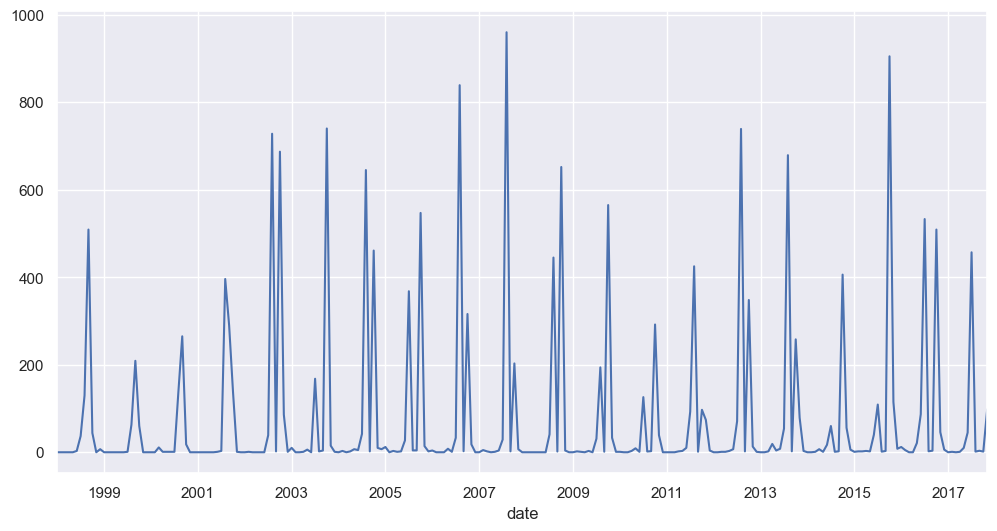

In [151]:
df_fires_acre['number'].plot()

In [152]:
series_fires = df_fires_acre.drop(['year','state','month'], axis=1)

In [153]:
series_fires

,number
date,
1998-01-01,0.000
1998-02-01,0.000
1998-03-01,0.000
1998-04-01,0.000
1998-05-01,0.000
...,...
2017-07-01,457.000
2017-08-01,1.493
2017-09-01,3.429


In [154]:
decomp = seasonal_decompose(series_fires)

In [155]:
decomp.trend

date
1998-01-01   NaN
1998-02-01   NaN
1998-03-01   NaN
1998-04-01   NaN
1998-05-01   NaN
              ..
2017-07-01   NaN
2017-08-01   NaN
2017-09-01   NaN
2017-10-01   NaN
2017-11-01   NaN
Name: trend, Length: 239, dtype: float64

In [156]:
decomp.seasonal

date
1998-01-01    -77.158837
1998-02-01    -78.903340
1998-03-01    -77.302291
1998-04-01    -75.153030
1998-05-01    -73.169495
                 ...    
2017-07-01     18.683268
2017-08-01    258.288496
2017-09-01     -9.212750
2017-10-01    303.203005
2017-11-01    -46.031644
Name: seasonal, Length: 239, dtype: float64

In [157]:
decomp.resid

date
1998-01-01   NaN
1998-02-01   NaN
1998-03-01   NaN
1998-04-01   NaN
1998-05-01   NaN
              ..
2017-07-01   NaN
2017-08-01   NaN
2017-09-01   NaN
2017-10-01   NaN
2017-11-01   NaN
Name: resid, Length: 239, dtype: float64

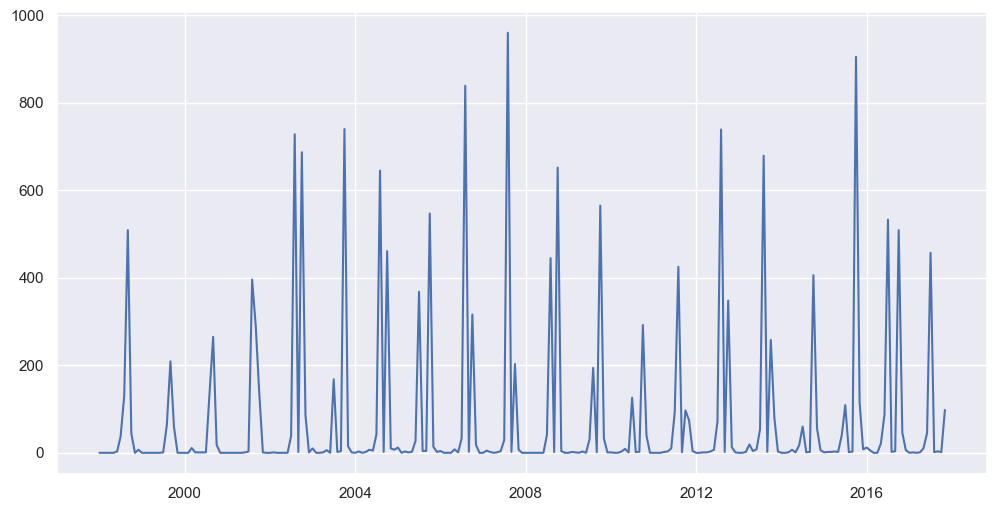

In [159]:
plt.plot(series_fires)

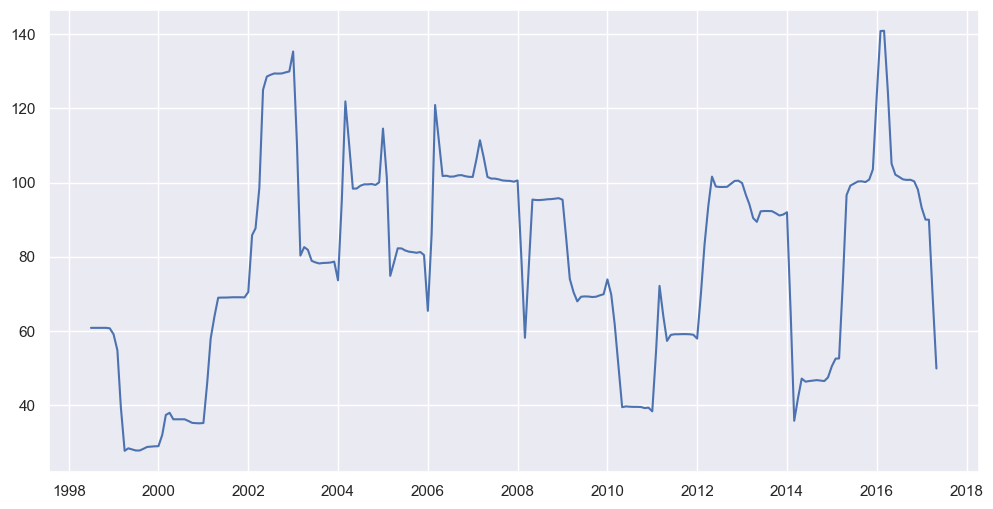

In [160]:
plt.plot(decomp.trend)

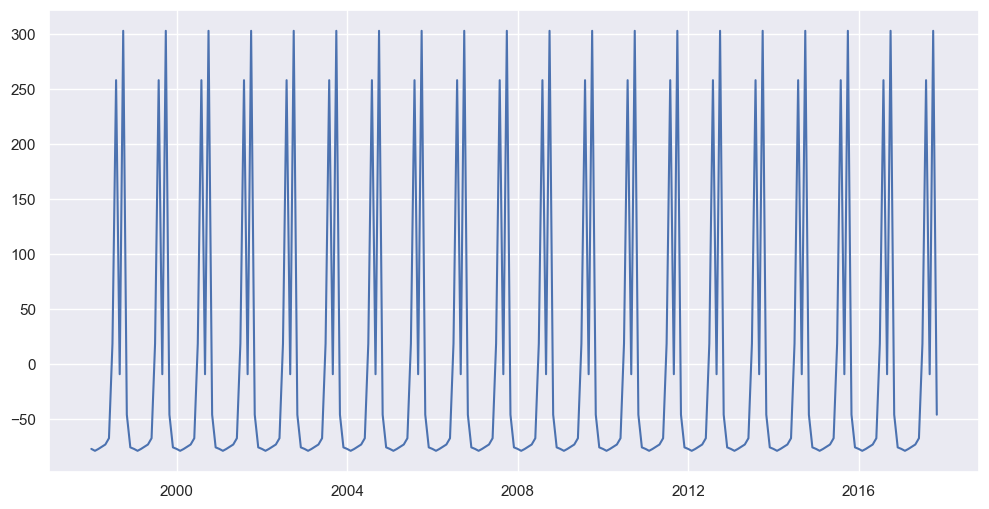

In [161]:
plt.plot(decomp.seasonal)

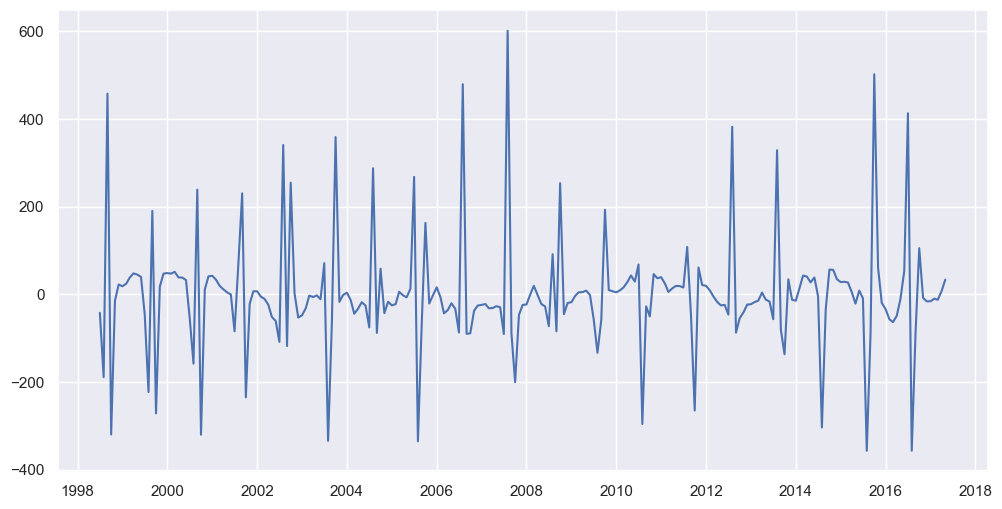

In [162]:
plt.plot(decomp.resid)

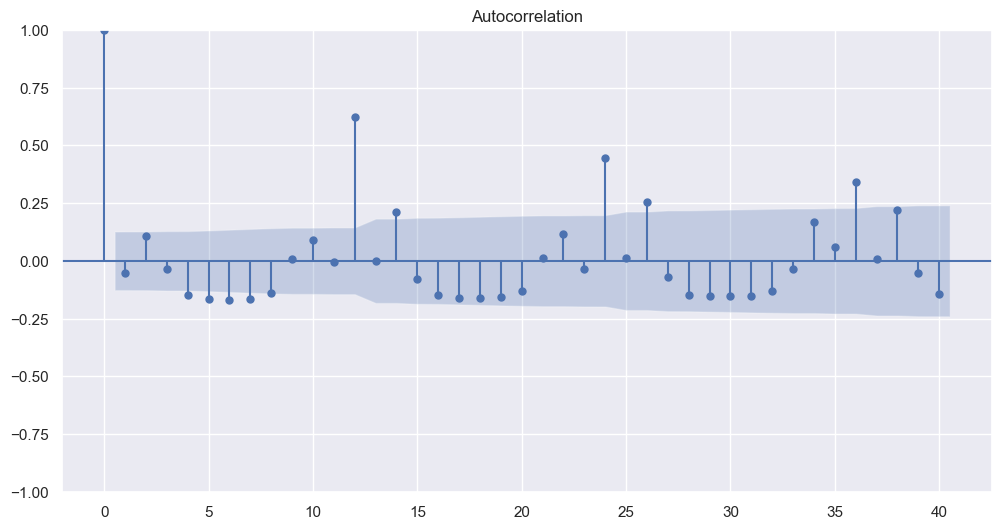

In [163]:
sm.graphics.tsa.plot_acf(series_fires, lags=40)
plt.show()